In [1]:
import pandas as pd

In [2]:
banknote_df = pd.read_csv('data_banknote_authentication.txt', sep= ",", header=None,names=['f1_variance', 'f2_skewness', 'f3_curtosis','f4_entropy','class'])

In [3]:
banknote_df

,f1_variance,f2_skewness,f3_curtosis,f4_entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
#Question1.1
banknote_df['color']=banknote_df['class']
banknote_df['color'].replace({0: "green", 1: "red"}, inplace=True)

In [5]:
banknote_df

,f1_variance,f2_skewness,f3_curtosis,f4_entropy,class,color
0,3.62160,8.66610,-2.8073,-0.44699,0,green
1,4.54590,8.16740,-2.4586,-1.46210,0,green
2,3.86600,-2.63830,1.9242,0.10645,0,green
3,3.45660,9.52280,-4.0112,-3.59440,0,green
4,0.32924,-4.45520,4.5718,-0.98880,0,green
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,red
1368,-1.38870,-4.87730,6.4774,0.34179,1,red
1369,-3.75030,-13.45860,17.5932,-2.77710,1,red
1370,-3.56370,-8.38270,12.3930,-1.28230,1,red


In [6]:
mean = banknote_df.groupby(by=["class"]).mean().round(2)
mean = mean.add_suffix('_μ()')

In [7]:
std = banknote_df.groupby(by=["class"]).std().round(2)
std = std.add_suffix('_σ()')

In [8]:
banknote_df.describe().round(2)

,f1_variance,f2_skewness,f3_curtosis,f4_entropy,class
count,1372.00,1372.00,1372.00,1372.00,1372.00
mean,0.43,1.92,1.40,-1.19,0.44
std,2.84,5.87,4.31,2.10,0.50
min,-7.04,-13.77,-5.29,-8.55,0.00
25%,-1.77,-1.71,-1.57,-2.41,0.00
50%,0.50,2.32,0.62,-0.59,0.00
75%,2.82,6.81,3.18,0.39,1.00
max,6.82,12.95,17.93,2.45,1.00


In [9]:
result = pd.merge(mean, std, on="class")
result.columns

Index(['f1_variance_μ()', 'f2_skewness_μ()', 'f3_curtosis_μ()',
       'f4_entropy_μ()', 'f1_variance_σ()', 'f2_skewness_σ()',
       'f3_curtosis_σ()', 'f4_entropy_σ()'],
      dtype='object')

In [10]:
all = {'f1_variance_μ()': 0.43, 'f2_skewness_μ()':1.92 , 'f3_curtosis_μ()':1.40,
       'f4_entropy_μ()': -1.19, 'f1_variance_σ()': 2.84, 'f2_skewness_σ()':5.87,
       'f3_curtosis_σ()':4.31, 'f4_entropy_σ()':2.10}
result = result.append(all, ignore_index = True)
result.rename(index={ 2 : 'all'}, inplace=True)
result

,f1_variance_μ(),f2_skewness_μ(),f3_curtosis_μ(),f4_entropy_μ(),f1_variance_σ(),f2_skewness_σ(),f3_curtosis_σ(),f4_entropy_σ()
0,2.28,4.26,0.80,-1.15,2.02,5.14,3.24,2.13
1,-1.87,-0.99,2.15,-1.25,1.88,5.40,5.26,2.07
all,0.43,1.92,1.40,-1.19,2.84,5.87,4.31,2.10


Question1.3
    I found that in class 0, the mean of f1 and f2 is much more bigger than class 1; but the mean of f3 is smaller than class 1.
    And as the std value shown on two classes, class 0 is bigger in f1 feature, but smaller in f3 feature.

In [11]:
#question 2.1
import seaborn as sns
from sklearn.model_selection import train_test_split

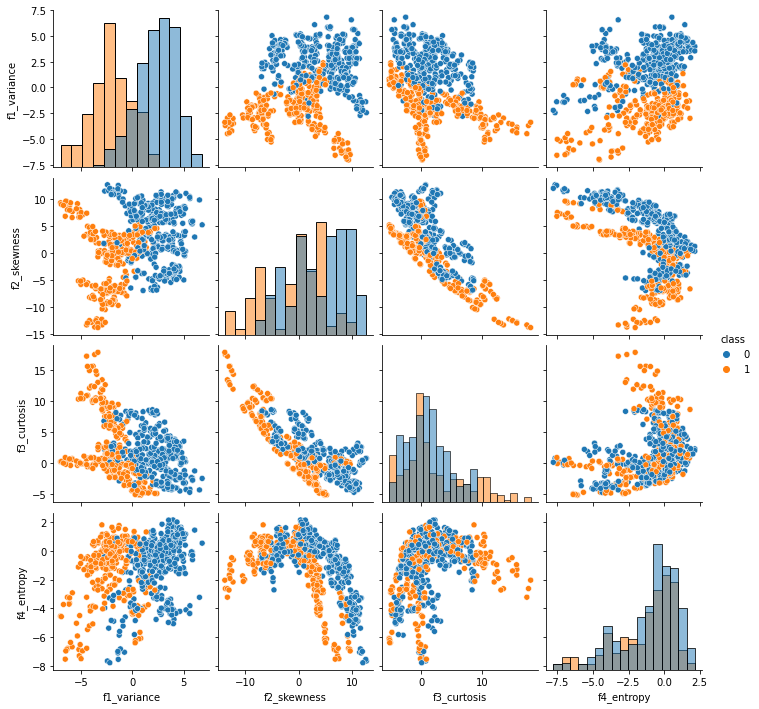

In [184]:
train_set,test_set = train_test_split(banknote_df,train_size=0.5, random_state = 126)
sns.pairplot(train_set,hue = 'class', diag_kind = 'hist')

In [185]:
#Question 2
#visually examine your results. Come up with three simple comparisons that you think may be sufficient to detect a fake bill.
visual_pre = []
for i,j,k in zip(train_set['f1_variance'],
                 train_set['f2_skewness'],
                 train_set['f3_curtosis']):
    if i > 1 and j > 2 and k <= 1:
        visual_pre.append(0)
    else:
        visual_pre.append(1)

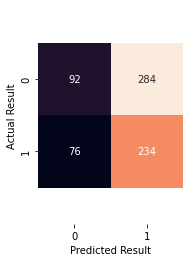

In [186]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat = confusion_matrix(test_set['class'], visual_pre)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [187]:
from sklearn.metrics import classification_report
print(classification_report(test_set['class'], visual_pre))

              precision    recall  f1-score   support

           0       0.55      0.24      0.34       376
           1       0.45      0.75      0.57       310

    accuracy                           0.48       686
   macro avg       0.50      0.50      0.45       686
weighted avg       0.50      0.48      0.44       686



Question2.6:
does you simple classifier gives you higher accuracy on identifying ”fake” bills or ”real” bills” Is your accuracy better
than 50% (”coin” flipping)?

No, the accuracy of this simple calssifier is 0.48.

In [188]:
#Questin3
from sklearn.neighbors import KNeighborsClassifier
X = banknote_df[['f1_variance', 'f2_skewness', 'f3_curtosis', 'f4_entropy']].values
y = banknote_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)

In [189]:
from sklearn.metrics import accuracy_score
K = [3, 5, 7, 9, 11]
accuracy = []
for k in K:
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    prediction_test = knn_classifier.predict(X_test)
    rate = accuracy_score(y_test, prediction_test)
    accuracy.append(rate)
accuracy

[0.9985422740524781,
 0.9912536443148688,
 0.9927113702623906,
 0.9883381924198251,
 0.9883381924198251]

<AxesSubplot:>

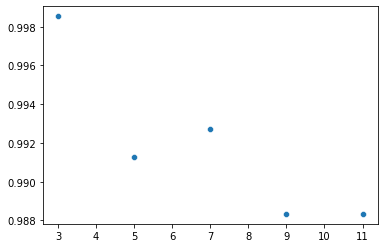

In [190]:
sns.scatterplot(x = K, y = accuracy)

In [191]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)
confusion_matrix(y_test, prediction_test)

array([[375,   1],
       [  0, 310]], dtype=int64)

In [192]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       310

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686



My k-NN classifier is obviously better than my simple classifier.

In [193]:
#question3.5
#the value is 4 6 1 8
bill_x = pd.DataFrame({'f1_variance':4, 'f2_skewness':6, 'f3_curtosis':1, 'f4_entropy':8},index=[0])

predict by my simiple calssifier
4 >1, 6>2, 1 =1
So the class we predict is 0

In [194]:
#by my knn model
billx_pre = knn_classifier.predict(bill_x)
billx_pre

array([0], dtype=int64)

In [195]:
#Quetion4.1
#f1 missing
X = banknote_df[[ 'f2_skewness', 'f3_curtosis', 'f4_entropy']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)
accuracy_score(y_test, prediction_test)

0.9518950437317785

In [196]:
#f2 missing
X = banknote_df[[ 'f1_variance', 'f3_curtosis', 'f4_entropy']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)
accuracy_score(y_test, prediction_test)

0.967930029154519

In [197]:
#f3 missing
X = banknote_df[[ 'f1_variance', 'f2_skewness', 'f4_entropy']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)
accuracy_score(y_test, prediction_test)

0.9708454810495627

In [198]:
#f4 missing
X = banknote_df[[ 'f1_variance', 'f2_skewness',  'f3_curtosis']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)
prediction_test = knn_classifier.predict(X_test)
accuracy_score(y_test, prediction_test)

0.9970845481049563

question2.2. did accuracy increase in any of the 4 cases compared with accuracy when all 4 features are used?

No

3. which feature, when removed, contributed the most to loss of accuracy?

f1

4. which feature, when removed, contributed the least to loss of accuracy?

f4

In [199]:
#Question5
from sklearn.linear_model import LogisticRegression
X = banknote_df[[ 'f1_variance', 'f2_skewness',  'f3_curtosis','f4_entropy']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)

In [201]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions) 

0.9766763848396501

In [202]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       376
           1       0.95      1.00      0.97       310

    accuracy                           0.98       686
   macro avg       0.98      0.98      0.98       686
weighted avg       0.98      0.98      0.98       686



The logistic regression model is better than the simple classifier model

Based on the performance. The logistic regression model is not better than Knn model.

In [204]:
logmodel.predict(bill_x)

array([0], dtype=int64)

All three model predict this bill to class0.

In [207]:
#Question6
#f1 missing
X = banknote_df[[  'f2_skewness',  'f3_curtosis','f4_entropy']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions) 

0.8090379008746356

In [208]:
#Question6
#f2 missing
X = banknote_df[[ 'f1_variance',  'f3_curtosis','f4_entropy']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions) 

0.8746355685131195

In [209]:
#Question6
#f3 missing
X = banknote_df[[ 'f1_variance', 'f2_skewness', 'f4_entropy']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions) 

0.8498542274052479

In [210]:
#Question6
#f4 missing
X = banknote_df[[ 'f1_variance', 'f2_skewness',  'f3_curtosis']]
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=126)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions) 

0.9766763848396501

2. did accuracy increase in any of the 4 cases compared with accuracy when all 4 features are used?

No, when f4 is missing, the accuracy is same with when all 4 features are used.

3. which feature, when removed, contributed the most to loss of accuracy?

f1

4. which feature, when removed, contributed the least to loss of accuracy?

f4

5. is relative significance of features the same as you obtained using k-NN?
Yes, they are same.